In [1]:
import zipfile

fantasy_zip = zipfile.ZipFile('homework.zip')
fantasy_zip.extractall('/content/')
fantasy_zip.close()

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
def read_data(folder):
    data = pd.DataFrame()
    for file in os.listdir(folder):
        if file.endswith(".csv"):
            file_path = os.path.join(folder, file)
            df = pd.read_csv(file_path, header=None, names=['accelerometer_X', 'accelerometer_Y'], skiprows=1)
            df['activity'] = folder.split('/')[-1]  # Додаємо мітку для класифікації
            data = pd.concat([data, df], ignore_index=True)
    return data

In [4]:
idle_data = read_data('data/idle')
running_data = read_data('data/running')
stairs_data = read_data('data/stairs')
walking_data = read_data('data/walking')

In [5]:
all_data = pd.concat([idle_data, running_data, stairs_data, walking_data], ignore_index=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(all_data[['accelerometer_X', 'accelerometer_Y']], all_data['activity'], test_size=0.2, random_state=42)



In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Навчання SVM моделі

In [8]:
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear')

# Навчання моделі випадкового лісу

In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [10]:
svm_predictions = svm_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)

# Оцінка точності моделей

In [11]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [12]:
print(f'SVM Accuracy: {svm_accuracy}')
print(f'Random Forest Accuracy: {rf_accuracy}')

SVM Accuracy: 0.7499226245744351
Random Forest Accuracy: 0.9995873310636542


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

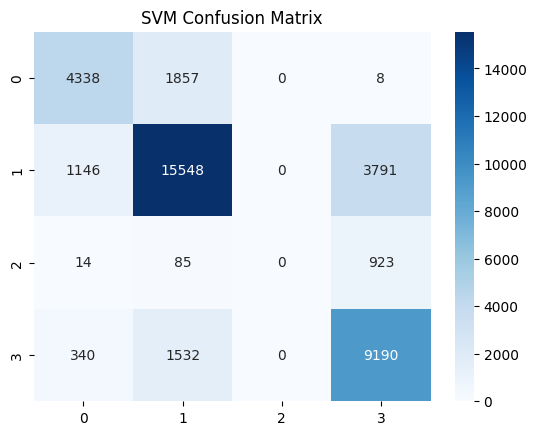

In [14]:
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

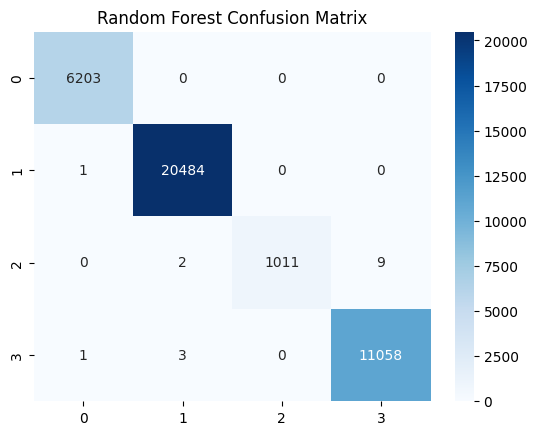

In [15]:
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()